In [2]:
import numpy as np
from generateTwoMoonData import genTwoMoons
import matplotlib.pyplot as plt
from sklearn import svm
import os
np.random.seed(42)
os.system("mkdir graphs_3")

0

In [3]:
def get_n_per_class(X, Y, trSamples, valSamples, teSamples):
    ix = np.where(Y==0)
    X_0 = X[ix][:trSamples]
    Y_0 = Y[ix][:trSamples]
    vX_0 = X[ix][trSamples:trSamples+valSamples]
    vY_0 = Y[ix][trSamples:trSamples+valSamples]
    tX_0 = X[ix][trSamples+valSamples:trSamples+valSamples+teSamples]
    tY_0 = Y[ix][trSamples+valSamples:trSamples+valSamples+teSamples]
    
    ix = np.where(Y==1)
    X_1 = X[ix][:trSamples]
    Y_1 = Y[ix][:trSamples]
    vX_1 = X[ix][trSamples:trSamples+valSamples]
    vY_1 = Y[ix][trSamples:trSamples+valSamples]
    tX_1 = X[ix][trSamples+valSamples:trSamples+valSamples+teSamples]
    tY_1 = Y[ix][trSamples+valSamples:trSamples+valSamples+teSamples]
    
    X = np.concatenate((X_0, X_1), axis=0)
    Y = np.concatenate((Y_0, Y_1), axis=0)
    
    vX = np.concatenate((vX_0, vX_1), axis=0)
    vY = np.concatenate((vY_0, vY_1), axis=0)
    
    tX = np.concatenate((tX_0, tX_1), axis=0)
    tY = np.concatenate((tY_0, tY_1), axis=0)
    
    return X, Y, vX, vY, tX, tY

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def draw_regions(X, Y, clf, title):
    fig, sub = plt.subplots(1, 1)
    ax = sub
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
#     ax.set_title(title)
    plt.savefig("graphs_3/"+title+".png")
    plt.show()
    
def accuracy(X, Y, clf):
    Pred = clf.predict(X)
    acc = np.sum(Y == Pred)/Y.shape[0]
    return acc*100

In [4]:
X, Y = genTwoMoons(n=1000, radius=1.5, width=0.5, dist=-1)
X = X.T

print(np.sum(Y==0))

train_X,train_Y,vX,vY,tX,tY = get_n_per_class(X,Y, 200, 50, 100)

print(train_X.shape, vX.shape, tX.shape)

496
(400, 2) (100, 2) (200, 2)


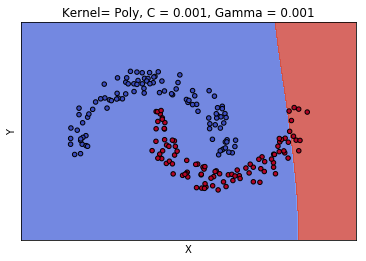

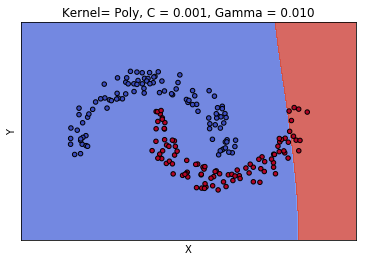

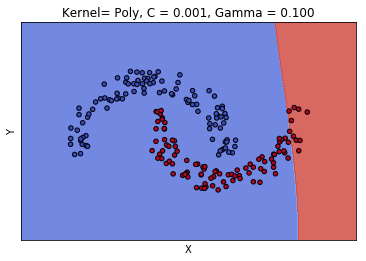

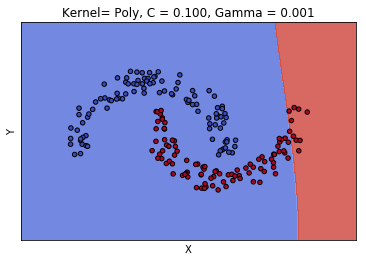

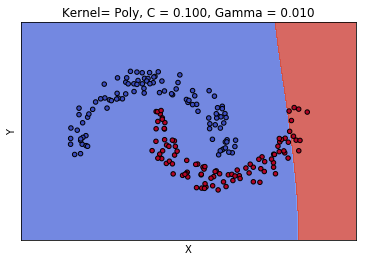

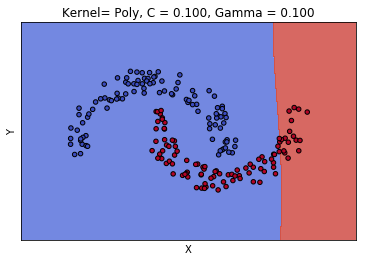

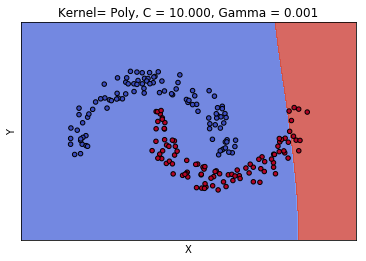

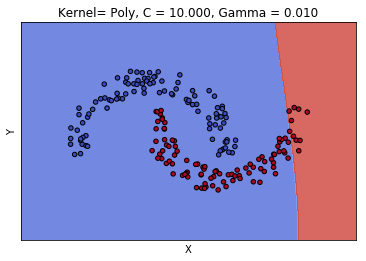

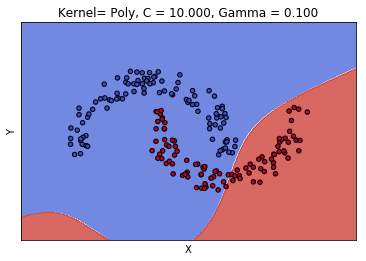

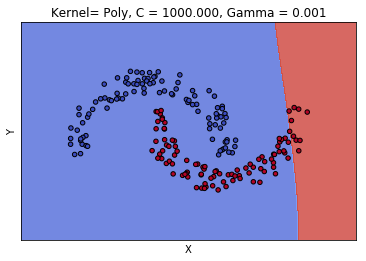

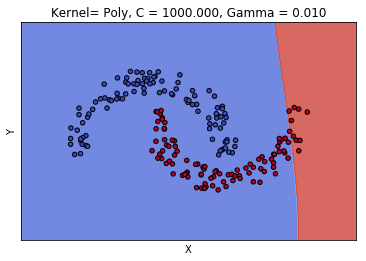

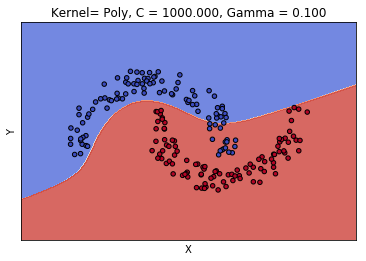

In [9]:
C_values = [0.001, 0.1, 10, 1000]
gamma_values = [0.001, 0.01, 0.1]

accuracies = ''

for C in C_values:
    for g in gamma_values:
        clf = svm.SVC(kernel='poly',degree=5,C=C,gamma=g)
        clf.fit(train_X, train_Y)
        acc = accuracy(vX, vY, clf)
        acc_t = accuracy(train_X, train_Y, clf)
        acc_ts = accuracy(tX, tY, clf)
        act_str = "Training Accuracy for   Kernel= Poly, C = "+"{:8.3f}".format(C)+", Gamma = "+"{0:0.3f}".format(g)+" : "+str(acc_t)+"%"+"\n"
        ac_str = "Validation Accuracy for Kernel= Poly, C = "+"{:8.3f}".format(C)+", Gamma = "+"{0:0.3f}".format(g)+" : "+str(acc)+"%"+"\n"
        acts_str = "Testing Accuracy for    Kernel= Poly, C = "+"{:8.3f}".format(C)+", Gamma = "+"{0:0.3f}".format(g)+" : "+str(acc_ts)+"%"+"\n"
        accuracies += act_str + ac_str + acts_str + "\n"
        title = "Kernel= Poly, C = "+"{0:0.3f}".format(C)+", Gamma = "+"{0:0.3f}".format(g)
        draw_regions(tX, tY, clf, title)

In [8]:
print(accuracies)

Training Accuracy for   Kernel= Poly, C =    0.001, Gamma = 0.001 : 57.25%
Validation Accuracy for Kernel= Poly, C =    0.001, Gamma = 0.001 : 59.0%
Testing Accuracy for    Kernel= Poly, C =    0.001, Gamma = 0.001 : 54.50000000000001%

Training Accuracy for   Kernel= Poly, C =    0.001, Gamma = 0.010 : 57.49999999999999%
Validation Accuracy for Kernel= Poly, C =    0.001, Gamma = 0.010 : 59.0%
Testing Accuracy for    Kernel= Poly, C =    0.001, Gamma = 0.010 : 54.50000000000001%

Training Accuracy for   Kernel= Poly, C =    0.001, Gamma = 0.100 : 57.49999999999999%
Validation Accuracy for Kernel= Poly, C =    0.001, Gamma = 0.100 : 59.0%
Testing Accuracy for    Kernel= Poly, C =    0.001, Gamma = 0.100 : 54.50000000000001%

Training Accuracy for   Kernel= Poly, C =    0.100, Gamma = 0.001 : 57.49999999999999%
Validation Accuracy for Kernel= Poly, C =    0.100, Gamma = 0.001 : 59.0%
Testing Accuracy for    Kernel= Poly, C =    0.100, Gamma = 0.001 : 54.50000000000001%

Training Accurac

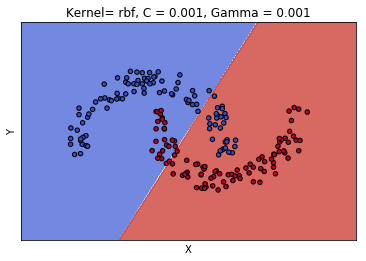

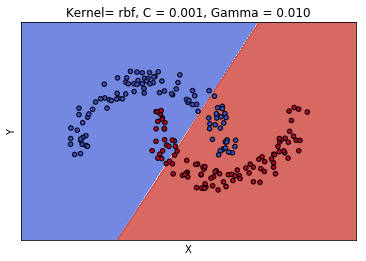

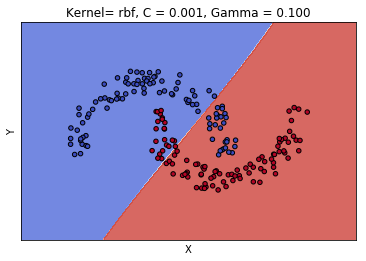

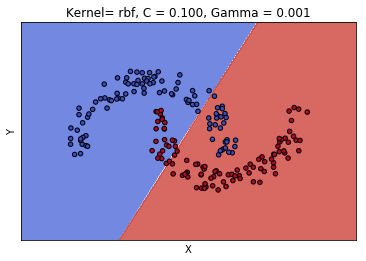

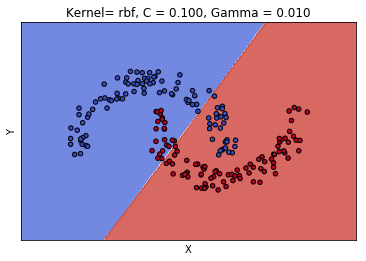

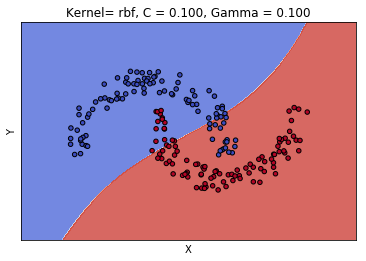

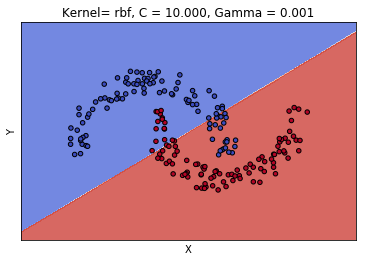

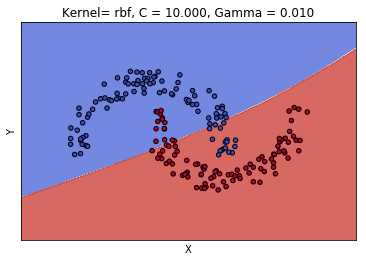

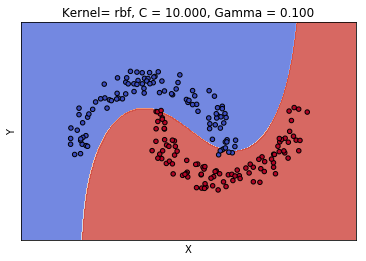

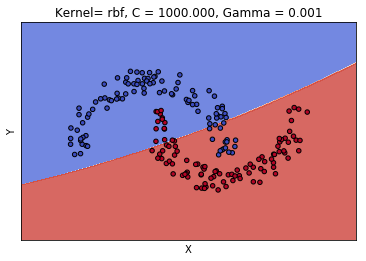

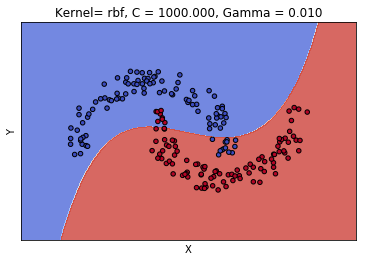

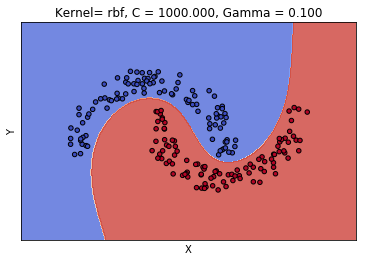

In [13]:
C_values = [0.001, 0.1, 10, 1000]
gamma_values = [0.001, 0.01, 0.1]

accuracies = ''

for C in C_values:
    for g in gamma_values:
        clf = svm.SVC(kernel='rbf',C=C,gamma=g)
        clf.fit(train_X, train_Y)
        acc = accuracy(vX, vY, clf)
        acc_t = accuracy(train_X, train_Y, clf)
        acc_ts = accuracy(tX, tY, clf)
        act_str = "Training Accuracy for   Kernel= rbf, C = "+"{:8.3f}".format(C)+", Gamma = "+"{0:0.3f}".format(g)+" : "+str(acc_t)+"%"+"\n"
        ac_str = "Validation Accuracy for Kernel= rbf, C = "+"{:8.3f}".format(C)+", Gamma = "+"{0:0.3f}".format(g)+" : "+str(acc)+"%"+"\n"
        acts_str = "Testing Accuracy for    Kernel= rbf, C = "+"{:8.3f}".format(C)+", Gamma = "+"{0:0.3f}".format(g)+" : "+str(acc_ts)+"%"+"\n"
        accuracies += act_str + ac_str + acts_str + "\n"
        title = "Kernel= rbf, C = "+"{0:0.3f}".format(C)+", Gamma = "+"{0:0.3f}".format(g)
        draw_regions(tX, tY, clf, title)

In [14]:
print(accuracies)

Training Accuracy for   Kernel= rbf, C =    0.001, Gamma = 0.001 : 77.75%
Validation Accuracy for Kernel= rbf, C =    0.001, Gamma = 0.001 : 74.0%
Testing Accuracy for    Kernel= rbf, C =    0.001, Gamma = 0.001 : 73.5%

Training Accuracy for   Kernel= rbf, C =    0.001, Gamma = 0.010 : 77.75%
Validation Accuracy for Kernel= rbf, C =    0.001, Gamma = 0.010 : 74.0%
Testing Accuracy for    Kernel= rbf, C =    0.001, Gamma = 0.010 : 73.5%

Training Accuracy for   Kernel= rbf, C =    0.001, Gamma = 0.100 : 79.0%
Validation Accuracy for Kernel= rbf, C =    0.001, Gamma = 0.100 : 77.0%
Testing Accuracy for    Kernel= rbf, C =    0.001, Gamma = 0.100 : 74.5%

Training Accuracy for   Kernel= rbf, C =    0.100, Gamma = 0.001 : 77.75%
Validation Accuracy for Kernel= rbf, C =    0.100, Gamma = 0.001 : 74.0%
Testing Accuracy for    Kernel= rbf, C =    0.100, Gamma = 0.001 : 73.5%

Training Accuracy for   Kernel= rbf, C =    0.100, Gamma = 0.010 : 78.0%
Validation Accuracy for Kernel= rbf, C =    